<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/ready/stat_ml_begining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr

In [3]:
df = pd.read_csv('/content/covid_data_6_mistakes (1).csv')
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
columns =['Min_Platlets', 'Max_ESR', 'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',  'Max_CRP','Max_Creatinine','GFR','L/Pl_Ratio']

In [ ]:
df_no_ind = df[df['Ab_ind'] == 0]
df_ind = df[df['Ab_ind'] == 1]



---
## Классические статистические тесты


## Проверим подвыборка на нормальность распределения.
Нулевая гипотеза в этом случае: данные распределены нормально. p-value в данном случае, показывает вероятность ошибиться в случает, если мы отвергнем нулевую гипотезу.

In [ ]:
for i in columns:
  lst1 = df_no_ind[i]
  lst2 = df_ind[i]
  shapiro_test = stats.shapiro(lst1) # тест шапиро-уилка
  shapiro_test2 = stats.shapiro(lst2) # тест шапиро-уилка
  if shapiro_test[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test[1]))
  if shapiro_test2[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test2[1]))
  else:
    pass

Данные Min_Platlets распределены ненормально,           p-value - 2.2496317308995373e-11
Данные Min_Platlets распределены ненормально,           p-value - 0.0046564731746912
Данные Max_ESR распределены ненормально,           p-value - 2.552094656493864e-06
Данные Max_ESR распределены ненормально,           p-value - 2.1818234017700888e-05
Данные Max_Fibrinogen распределены ненормально,           p-value - 8.701200213717984e-17
Данные Max_Fibrinogen распределены ненормально,           p-value - 4.6909113734727725e-05
Данные Max_LDH распределены ненормально,           p-value - 1.7956045894607087e-07
Данные Max_LDH распределены ненормально,           p-value - 0.0016341493465006351
Данные Max_Leucocytes распределены ненормально,           p-value - 1.087012632683404e-10
Данные Max_Leucocytes распределены ненормально,           p-value - 1.7819214159775498e-10
Данные Max_CRP распределены ненормально,           p-value - 5.4264262484617843e-17
Данные Max_CRP распределены ненормально,      

p-value ниже 0.05, т.о мы отвергаем нулевую гипотезу о нормальности распределения и будем работать с данными используя непараметрические стат.методы

In [ ]:
def Basic_statistics(lst_1, lst_2):
    """ 
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков. 
    В частности: показаны, не показаны антибиотики
    """
    res_mw = mannwhitneyu(lst_1, lst_2, 
                       use_continuity=True, 
                       alternative=None) # u -тест манна-уитни
    res_kw = kruskal(lst_1, lst_2)## краскела уолиса
    anova = stats.f_oneway(lst_1, lst_2) #тест анова
    return res_mw[1], res_kw[1],  anova[1]
for col in columns:
  lst1 = df_no_ind[col]
  lst2 = df_ind[col]
  mw =  Basic_statistics(lst1, lst2)[0]
  kw =  Basic_statistics(lst1, lst2)[1]
  an =  Basic_statistics(lst1, lst2)[2]
  if mw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Манна-Уитни'.format(col,  mw))
  if kw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Крускала-Уоллиса'.format(col,  kw))
  if an < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Анова'.format(col,  an))
  else:
    pass


Данные Min_Platlets статисически значимо различаются в подгруппах,           p-value - 3.2855745293407934e-07, тест Манна-Уитни
Данные Min_Platlets статисически значимо различаются в подгруппах,           p-value - 6.565008618092226e-07, тест Крускала-Уоллиса
Данные Min_Platlets статисически значимо различаются в подгруппах,           p-value - 2.2212869639839813e-07, тест Анова
Данные Max_ESR статисически значимо различаются в подгруппах,           p-value - 6.572563797722308e-05, тест Манна-Уитни
Данные Max_ESR статисически значимо различаются в подгруппах,           p-value - 0.00013135466386457627, тест Крускала-Уоллиса
Данные Max_ESR статисически значимо различаются в подгруппах,           p-value - 0.00011784582665018135, тест Анова
Данные Max_Fibrinogen статисически значимо различаются в подгруппах,           p-value - 9.701834609290562e-06, тест Манна-Уитни
Данные Max_Fibrinogen статисически значимо различаются в подгруппах,           p-value - 1.9387907471511455e-05, тест Крус

## Модели машинного обучения

In [30]:
# Для начала проверим баланс классов
neg, pos = np.bincount(df['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 863
    Positive: 148 (17.15% of total)



Мы имеет 17,15% позитивных классов, соответственно, у нас имеет место несбалансированные классы

In [ ]:
!pip install h2o
import h2o
h2o.init()
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_m1njlv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.902 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
def pipeline_gbm_grid(data, target_column,  split_ratio):
    data = h2o.H2OFrame(data)
    predictors = data.col_names
    predictors.remove(target_column)
    data[target_column] = data[target_column].asfactor()
    train, valid, test = data.split_frame(seed = 12345, ratios = split_ratio)
    target = target_column
    hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

    search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## limit the runtime to 5 minutes
    'max_models' : 15,  ## build no more than 15 models
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
    gbm_final_grid = H2OGradientBoostingEstimator(
    ## More trees is better if the learning rate is small enough
    ## we use "more than enough" trees with early stopping
    ntrees = 10000,
    ## we use learn rate with annealing for a fast scan
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## Score every 10 trees to make early stopping reproducible
    score_tree_interval = 10,
    ## Set seed for reproducibility
    seed = 12345,
    ## Balansing of classes
    balance_classes = True,
    keep_cross_validation_predictions = True)
    final_grid = H2OGridSearch(
    gbm_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
    final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
    sorted_gbm_grid = final_grid.get_grid(sort_by = 'auc', decreasing = True)
    best_gbm = sorted_gbm_grid.models[0]
    best_gbm_perf_valid = best_gbm.model_performance(valid)
    best_gbm_perf_test = best_gbm.model_performance(test)
    params_list = []
    for key, value in best_gbm.params.items():
      params_list.append(str(key)+" = "+str(value['actual']))
    return  best_gbm_perf_valid#best_gbm_perf_valid.aucpr(), best_gbm_perf_test.aucpr(), params_list

In [ ]:
pipeline_gbm_grid(data = df, target_column = 'Ab_ind', cols_to_remove = 'Ab_ind', split_ratio = [.7, .15])

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10186103705021149
RMSE: 0.31915675936788723
LogLoss: 0.3376416920930951
Mean Per-Class Error: 0.25952075310226785
AUC: 0.7847667950363714
AUCPR: 0.331171773862001
Gini: 0.5695335900727427

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11930284380010989: 


,,0,1,Error,Rate
0,0,98.0,25.0,0.2033,(25.0/123.0)
1,1,6.0,13.0,0.3158,(6.0/19.0)
2,Total,104.0,38.0,0.2183,(31.0/142.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.119303,0.456140,37.0
1,max f2,0.067548,0.583942,60.0
2,max f0point5,0.259743,0.439560,17.0
3,max accuracy,0.560944,0.866197,3.0
4,max precision,0.560944,0.500000,3.0
5,max recall,0.015485,1.000000,127.0
6,max specificity,0.594685,0.991870,0.0
7,max absolute_mcc,0.119303,0.369852,37.0
8,max min_per_class_accuracy,0.096911,0.731707,46.0
9,max mean_per_class_accuracy,0.119303,0.740479,37.0



Gains/Lift Table: Avg response rate: 13.38 %, avg score: 10.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014085,0.583902,0.000000,0.000000,0.000000,0.594341,0.000000,0.594341,0.000000,0.000000,-100.000000,-100.000000,-0.016260
1,2,0.021127,0.562462,7.473684,2.491228,1.000000,0.569375,0.333333,0.586019,0.052632,0.052632,647.368421,149.122807,0.036371
2,3,0.035211,0.495367,3.736842,2.989474,0.500000,0.528531,0.400000,0.563024,0.052632,0.105263,273.684211,198.947368,0.080873
3,4,0.042254,0.492757,0.000000,2.491228,0.000000,0.492850,0.333333,0.551328,0.000000,0.105263,-100.000000,149.122807,0.072743
4,5,0.056338,0.434463,3.736842,2.802632,0.500000,0.464664,0.375000,0.529662,0.052632,0.157895,273.684211,180.263158,0.117244
5,6,0.105634,0.279777,3.203008,2.989474,0.428571,0.361548,0.400000,0.451209,0.157895,0.315789,220.300752,198.947368,0.242619
6,7,0.154930,0.218428,3.203008,3.057416,0.428571,0.248561,0.409091,0.386730,0.157895,0.473684,220.300752,205.741627,0.367993
7,8,0.204225,0.161200,1.067669,2.577132,0.142857,0.183883,0.344828,0.337767,0.052632,0.526316,6.766917,157.713249,0.371844
8,9,0.302817,0.101564,1.601504,2.259486,0.214286,0.127508,0.302326,0.269311,0.157895,0.684211,60.150376,125.948592,0.440308
9,10,0.401408,0.077574,1.067669,1.966759,0.142857,0.089694,0.263158,0.225194,0.105263,0.789474,6.766917,96.675900,0.448010


In [ ]:
def pipeline_xgb_grid(data, target_column, cols_to_remove, split_ratio):
    data = h2o.H2OFrame(data)
    predictors = data.col_names
    predictors.remove(target_column)
    data[target_column] = data[target_column].asfactor()
    #data = data.drop(cols_to_remove)
    train, valid, test = data.split_frame(seed = 12345, ratios = split_ratio)
    target = target_column
    hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

    search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## limit the runtime to 5 minutes
    'max_models' : 15,  ## build no more than 15 models
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
    xgb_final_grid = H2OGradientBoostingEstimator(
    ## More trees is better if the learning rate is small enough
    ## we use "more than enough" trees with early stopping
    ntrees = 10000,
    ## we use learn rate with annealing for a fast scan
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## Score every 10 trees to make early stopping reproducible
    score_tree_interval = 10,
    ## Set seed for reproducibility
    seed = 12345,
    ## Balansing of classes
    balance_classes = True,
    keep_cross_validation_predictions = True)
    final_grid = H2OGridSearch(
    _final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
    final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
    sorted_xgb_grid = final_grid.get_grid(sort_by = 'auc', decreasing = True)
    best_xgb = sorted_xgb_grid.models[0]
    best_xgb_perf_valid = best_xgb.model_performance(valid)
    best_xgb_perf_test = best_xgb.model_performance(test)
    params_list = []
    for key, value in best_xgb.params.items():
      params_list.append(str(key)+" = "+str(value['actual']))
    return  best_xgb_perf_valid#best_xgb_perf_valid.aucpr(), best_xgb_perf_test.aucpr(), params_list

In [ ]:
pipeline_xgb_grid(data = df, target_column = 'Ab_ind',  split_ratio = [.7, .15])

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10291252754461808
RMSE: 0.32079982472660123
LogLoss: 0.3387290850456454
Mean Per-Class Error: 0.24753958065896442
AUC: 0.7770646127513907
AUCPR: 0.3275543397104789
Gini: 0.5541292255027814

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11590637196030239: 


,,0,1,Error,Rate
0,0,88.0,35.0,0.2846,(35.0/123.0)
1,1,4.0,15.0,0.2105,(4.0/19.0)
2,Total,92.0,50.0,0.2746,(39.0/142.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.115906,0.434783,49.0
1,max f2,0.089079,0.598592,65.0
2,max f0point5,0.407855,0.490196,7.0
3,max accuracy,0.407855,0.880282,7.0
4,max precision,0.407855,0.625000,7.0
5,max recall,0.042642,1.000000,117.0
6,max specificity,0.635093,0.991870,0.0
7,max absolute_mcc,0.115906,0.359893,49.0
8,max min_per_class_accuracy,0.124713,0.736842,45.0
9,max mean_per_class_accuracy,0.115906,0.752460,49.0



Gains/Lift Table: Avg response rate: 13.38 %, avg score: 12.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014085,0.609986,0.000000,0.000000,0.000000,0.623902,0.000000,0.623902,0.000000,0.000000,-100.000000,-100.000000,-0.016260
1,2,0.021127,0.536355,7.473684,2.491228,1.000000,0.606064,0.333333,0.617956,0.052632,0.052632,647.368421,149.122807,0.036371
2,3,0.035211,0.444650,3.736842,2.989474,0.500000,0.483992,0.400000,0.564370,0.052632,0.105263,273.684211,198.947368,0.080873
3,4,0.042254,0.427374,7.473684,3.736842,1.000000,0.437013,0.500000,0.543144,0.052632,0.157895,647.368421,273.684211,0.133504
4,5,0.056338,0.407850,7.473684,4.671053,1.000000,0.414904,0.625000,0.511084,0.105263,0.263158,647.368421,367.105263,0.238768
5,6,0.105634,0.300561,1.067669,2.989474,0.142857,0.354889,0.400000,0.438193,0.052632,0.315789,6.766917,198.947368,0.242619
6,7,0.154930,0.236162,1.067669,2.377990,0.142857,0.261391,0.318182,0.381938,0.052632,0.368421,6.766917,137.799043,0.246470
7,8,0.204225,0.172204,2.135338,2.319419,0.285714,0.199859,0.310345,0.337988,0.105263,0.473684,113.533835,131.941924,0.311083
8,9,0.302817,0.130029,1.601504,2.085679,0.214286,0.150098,0.279070,0.276814,0.157895,0.631579,60.150376,108.567931,0.379546
9,10,0.401408,0.108982,1.601504,1.966759,0.214286,0.117615,0.263158,0.237713,0.157895,0.789474,60.150376,96.675900,0.448010


In [ ]:
def pipeline_random_forest_grid(data, target_column, split_ratio):
    data = h2o.H2OFrame(data)
    predictors = data.col_names
    predictors.remove(target_column)
    data[target_column] = data[target_column].asfactor()
    train, valid, test = data.split_frame(seed = 12345, ratios = split_ratio)
    target = target_column
    hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

    search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## limit the runtime to 5 minutes
    'max_models' : 15,  ## build no more than 15 models
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC",
    'stopping_tolerance': 1e-3}
    drf_final_grid = H2ORandomForestEstimator(
    ## More trees is better if the learning rate is small enough
    ## we use "more than enough" trees with early stopping
    ntrees = 10000,
    ## Score every 10 trees to make early stopping reproducible
    score_tree_interval = 10,
    ## Set seed for reproducibility
    seed = 12345,
    ## Balansing of classes
    balance_classes = True,
    keep_cross_validation_predictions = True)
    final_grid = H2OGridSearch(
    drf_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
    final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
    sorted_drf_grid = final_grid.get_grid(sort_by = 'auc', decreasing = True)
    best_drf = sorted_drf_grid.models[0]
    best_drf_perf_valid = best_drf.model_performance(valid)
    best_drf_perf_test = best_drf.model_performance(test)
    params_list = []
    for key, value in best_drf.params.items():
      params_list.append(str(key)+" = "+str(value['actual']))
    return  best_drf_perf_valid#best_drf_perf_valid.aucpr(), best_drf_perf_test.aucpr(), params_list

In [ ]:
pipeline_random_forest_grid(data = df, target_column = 'Ab_ind',  split_ratio = [.7, .15])

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1066003259897037
RMSE: 0.3264970535697125
LogLoss: 0.35419063537150947
Mean Per-Class Error: 0.2779204107830553
AUC: 0.7441163885323063
AUCPR: 0.2910462742790633
Gini: 0.48823277706461266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23309660150201092: 


,,0,1,Error,Rate
0,0,114.0,9.0,0.0732,(9.0/123.0)
1,1,11.0,8.0,0.5789,(11.0/19.0)
2,Total,125.0,17.0,0.1408,(20.0/142.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.233097,0.444444,16.0
1,max f2,0.106689,0.563380,65.0
2,max f0point5,0.233097,0.459770,16.0
3,max accuracy,0.533160,0.859155,0.0
4,max precision,0.233097,0.470588,16.0
5,max recall,0.063407,1.000000,122.0
6,max specificity,0.533160,0.991870,0.0
7,max absolute_mcc,0.233097,0.364823,16.0
8,max min_per_class_accuracy,0.123094,0.707317,49.0
9,max mean_per_class_accuracy,0.123094,0.722080,49.0



Gains/Lift Table: Avg response rate: 13.38 %, avg score: 13.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014085,0.490191,0.000000,0.000000,0.000000,0.525551,0.000000,0.525551,0.000000,0.000000,-100.000000,-100.000000,-0.016260
1,2,0.021127,0.445538,7.473684,2.491228,1.000000,0.450255,0.333333,0.500452,0.052632,0.052632,647.368421,149.122807,0.036371
2,3,0.035211,0.377965,0.000000,1.494737,0.000000,0.411269,0.200000,0.464779,0.000000,0.052632,-100.000000,49.473684,0.020111
3,4,0.042254,0.369142,0.000000,1.245614,0.000000,0.377729,0.166667,0.450271,0.000000,0.052632,-100.000000,24.561404,0.011981
4,5,0.056338,0.358288,3.736842,1.868421,0.500000,0.361935,0.250000,0.428187,0.052632,0.105263,273.684211,86.842105,0.056483
5,6,0.105634,0.242707,5.338346,3.487719,0.714286,0.297568,0.466667,0.367231,0.263158,0.368421,433.834586,248.771930,0.303380
6,7,0.154930,0.192927,1.067669,2.717703,0.142857,0.220912,0.363636,0.320675,0.052632,0.421053,6.766917,171.770335,0.307231
7,8,0.204225,0.173733,1.067669,2.319419,0.142857,0.181673,0.310345,0.287123,0.052632,0.473684,6.766917,131.941924,0.311083
8,9,0.302817,0.140464,1.601504,2.085679,0.214286,0.156497,0.279070,0.244593,0.157895,0.631579,60.150376,108.567931,0.379546
9,10,0.401408,0.117895,1.067669,1.835642,0.142857,0.124332,0.245614,0.215056,0.105263,0.736842,6.766917,83.564174,0.387249


In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Ab_ind',axis=1), df['Ab_ind'], test_size=.2, random_state=1234)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
def all_estimators_pipline(x_train, y_train, x_test, y_test):
   
    #Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    log_reg_pred = log_reg.predict(x_test)
    print('LR conf{0}'.format(confusion_matrix(y_test,log_reg_pred)))
    
    #svm
    sv_clf = SVC()
    sv_clf.fit(x_train, y_train)
    sv_clf_pred = sv_clf.predict(x_test)
    print('SVM conf{0}'.format(confusion_matrix(y_test, sv_clf_pred)))
    
    # K Neighbors Classifier

    kn_clf = KNeighborsClassifier(n_neighbors=6)
    kn_clf.fit(x_train, y_train)
    kn_pred = kn_clf.predict(x_test)
    print('Kn conf{0}'.format(confusion_matrix(y_test, kn_pred)))
    # Decision Tree Classifier

    dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
    dt_clf.fit(x_train, y_train)
    dt_pred = dt_clf.predict(x_test)
    print('DT conf{0}'.format(confusion_matrix(y_test, dt_pred)))
    
    # RandomForestClassifier

    r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
    r_clf.fit(x_train, y_train)
    r_pred = r_clf.predict(x_test)
    print('RF conf{0}'.format(confusion_matrix(y_test, r_pred)))
  
    #xgb
    gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
    gradientboost_clf.fit(x_train,y_train)
    gradientboost_pred = gradientboost_clf.predict(x_test)
    print('XGB conf{0}'.format(confusion_matrix(y_test, gradientboost_pred)))
    
    #  lightgbm 

    lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
    lgb_clf.fit(x_train,y_train)
    lgb_pred = lgb_clf.predict(x_test)
    print('LGB conf{0}'.format(confusion_matrix(y_test, lgb_pred)))
    
    # # CatBoostClassifier

    # cat_clf = CatBoostClassifier()
    # cat_clf.fit(x_train,y_train)
    # cat_pred = cat_clf.predict(x_test)
    # print('CBC conf{0}'.format(confusion_matrix(y_test, cat_pred)))

In [18]:
all_estimators_pipline(x_train, y_train, x_test, y_test)

LR conf[[137   6]
 [ 22   8]]
SVM conf[[139   4]
 [ 26   4]]
Kn conf[[139   4]
 [ 26   4]]
DT conf[[143   0]
 [ 30   0]]
RF conf[[136   7]
 [ 24   6]]
XGB conf[[136   7]
 [ 19  11]]
LGB conf[[137   6]
 [ 21   9]]


In [19]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

In [20]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [21]:
cleaned_df = df.copy()

In [22]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Ab_ind'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Ab_ind'))
test_labels = np.array(test_df.pop('Ab_ind'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [23]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (552,)
Validation labels shape: (138,)
Test labels shape: (173,)
Training features shape: (552, 24)
Validation features shape: (138, 24)
Test features shape: (173, 24)


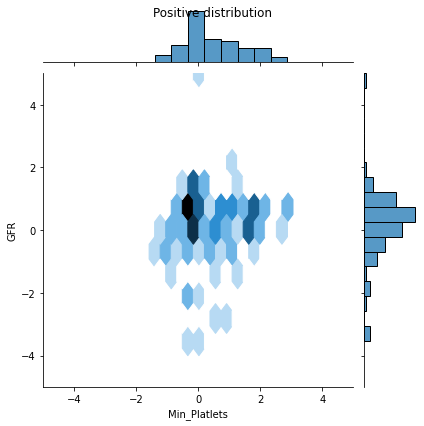

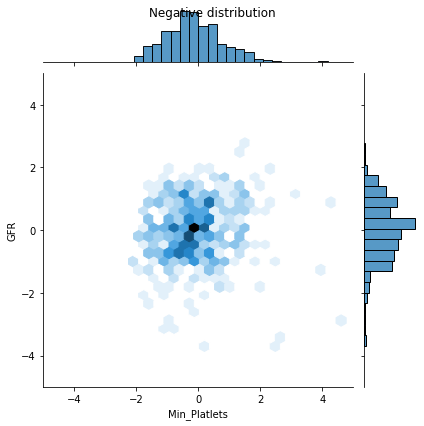

In [24]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Min_Platlets'], pos_df['GFR'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Min_Platlets'], neg_df['GFR'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [25]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [26]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [27]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                400       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [28]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.1994


In [31]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.57507027])

In [32]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.13542745],
       [0.05980507],
       [0.05974779],
       [0.10283461],
       [0.18274924],
       [0.11486146],
       [0.09984952],
       [0.11691177],
       [0.03027856],
       [0.18822464]], dtype=float32)

In [33]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4236


In [34]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [35]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [36]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [37]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

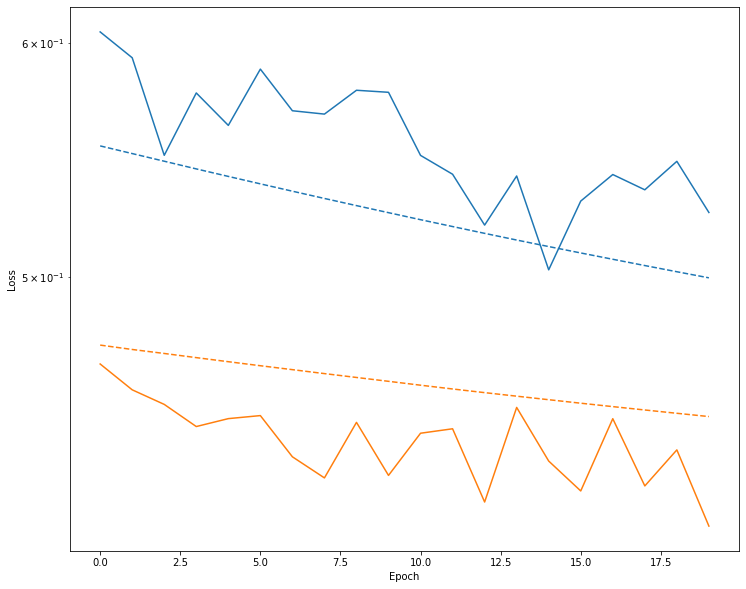

In [38]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [39]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.4608 - tp: 1.0000 - fp: 3.0000 - tn: 575.0000 - fn: 111.0000 - accuracy: 0.8348 - precision: 0.2500 - recall: 0.0089 - auc: 0.5958 - val_loss: 0.4743 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 113.0000 - val_fn: 25.0000 - val_accuracy: 0.8188 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6423
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 0.4579 - tp: 2.0000 - fp: 3.0000 - tn: 462.0000 - fn: 85.0000 - accuracy: 0.8406 - precision: 0.4000 - recall: 0.0230 - auc: 0.5583 - val_loss: 0.4728 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 113.0000 - val_fn: 25.0000 - val_accuracy: 0.8188 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6430
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 0.4616 - tp: 0.0000e+00 - fp: 4.0000 - tn: 461.0000 - fn: 87.0000 - accuracy: 0.8351 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 

In [41]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

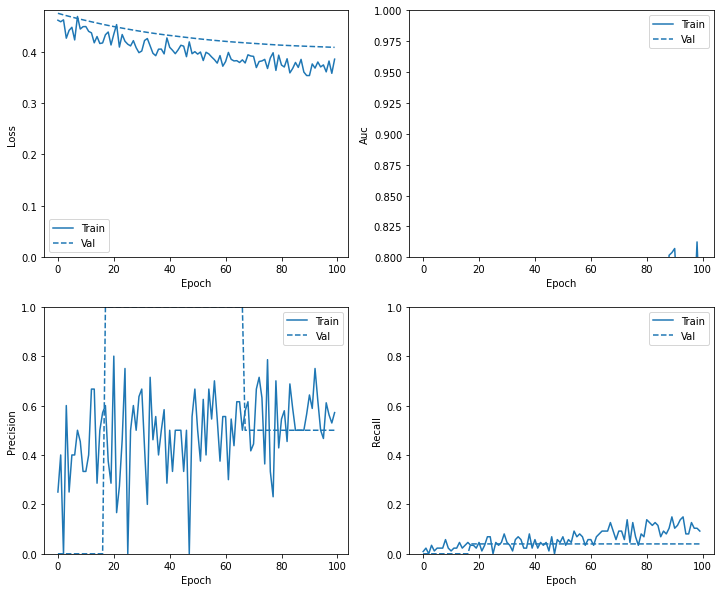

In [42]:
plot_metrics(baseline_history)

In [43]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [44]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.5029137134552002
tp :  2.0
fp :  2.0
tn :  135.0
fn :  34.0
accuracy :  0.7919074892997742
precision :  0.5
recall :  0.0555555559694767
auc :  0.7107664346694946

Legitimate Transactions Detected (True Negatives):  135
Legitimate Transactions Incorrectly Detected (False Positives):  2
Fraudulent Transactions Missed (False Negatives):  34
Fraudulent Transactions Detected (True Positives):  2
Total Fraudulent Transactions:  36


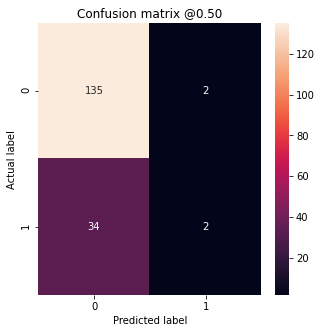

In [45]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [46]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

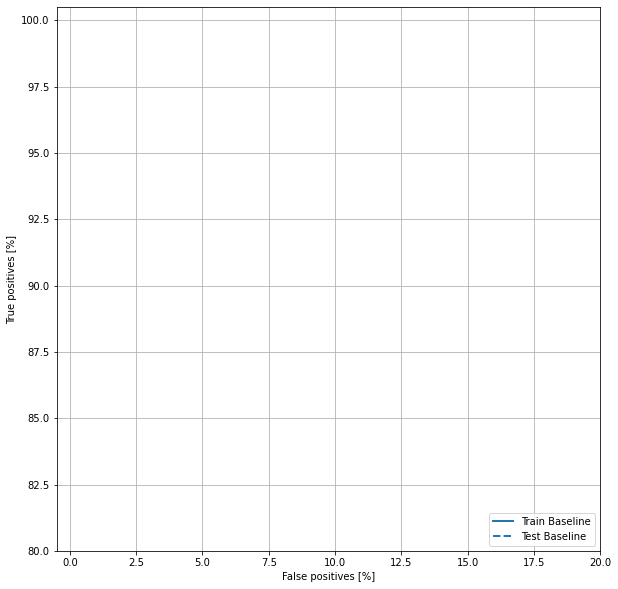

In [48]:
import sklearn
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [49]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.60
Weight for class 1: 2.92


In [50]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.0125 - tp: 6.0000 - fp: 8.0000 - tn: 594.0000 - fn: 117.0000 - accuracy: 0.8276 - precision: 0.4286 - recall: 0.0488 - auc: 0.6375 - val_loss: 0.4741 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 113.0000 - val_fn: 25.0000 - val_accuracy: 0.8188 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6372
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.9691 - tp: 4.0000 - fp: 2.0000 - tn: 463.0000 - fn: 83.0000 - accuracy: 0.8460 - precision: 0.6667 - recall: 0.0460 - auc: 0.6334 - val_loss: 0.4724 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 113.0000 - val_fn: 25.0000 - val_accuracy: 0.8188 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6386
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 1.0906 - tp: 2.0000 - fp: 6.0000 - tn: 459.0000 - fn: 85.0000 - accuracy: 0.8351 - precision: 0.2500 - recall: 0.0230 - auc: 0.5475 - val

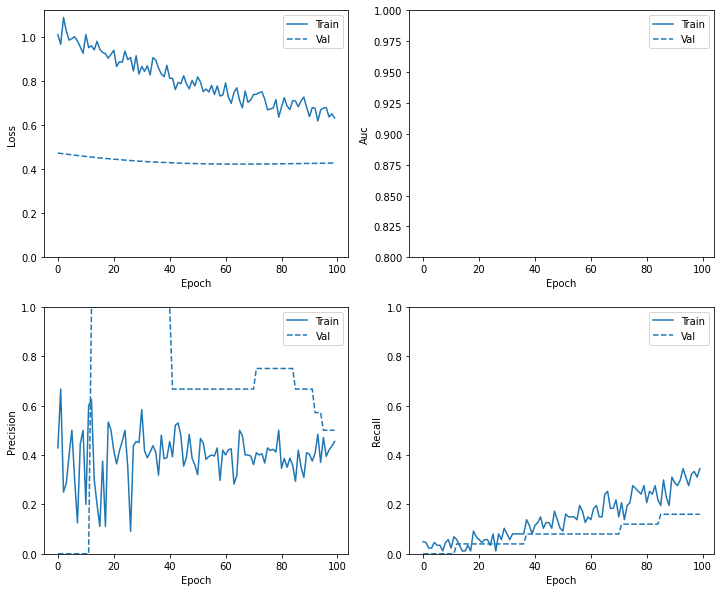

In [51]:
plot_metrics(weighted_history)

In [52]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.4984341263771057
tp :  9.0
fp :  8.0
tn :  129.0
fn :  27.0
accuracy :  0.7976878881454468
precision :  0.529411792755127
recall :  0.25
auc :  0.6906933784484863

Legitimate Transactions Detected (True Negatives):  129
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  27
Fraudulent Transactions Detected (True Positives):  9
Total Fraudulent Transactions:  36


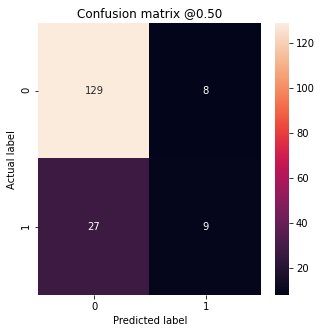

In [53]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

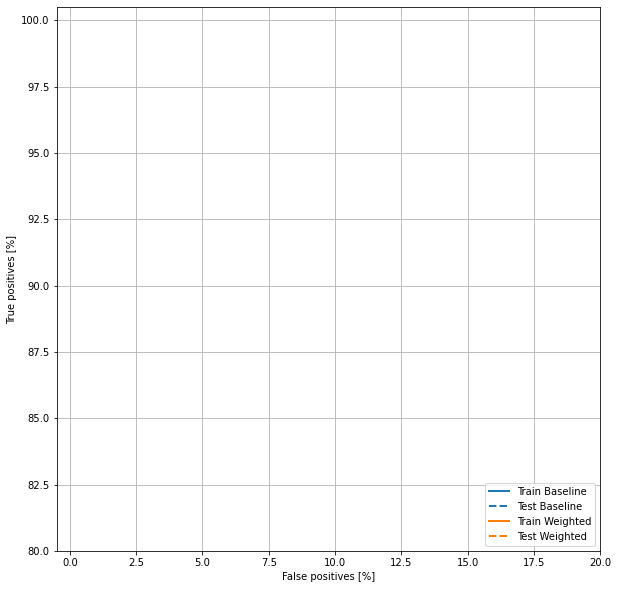

In [54]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [55]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [56]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(465, 24)

In [57]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(930, 24)

In [58]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [59]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 0.90835212  1.38519389 -0.48665697 -0.30624553 -0.14946212 -1.08711461
 -1.36011477  1.06361371 -0.94705186 -0.22677868 -0.11333153 -0.08543577
 -0.12126781 -1.06450637 -0.59947858 -0.34527434 -0.57147071  4.52576062
 -0.16713157 -0.47609523 -0.82639387 -0.10482848 -2.49474133 -0.22686201]

Label:  1


In [60]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [61]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.48486328125


In [63]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1.0

In [64]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.7384 - tp: 331.0000 - fp: 277.0000 - tn: 907.0000 - fn: 706.0000 - accuracy: 0.5574 - precision: 0.5444 - recall: 0.3192 - auc: 0.6114 - val_loss: 0.5565 - val_tp: 7.0000 - val_fp: 13.0000 - val_tn: 100.0000 - val_fn: 18.0000 - val_accuracy: 0.7754 - val_precision: 0.3500 - val_recall: 0.2800 - val_auc: 0.6393
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 0.7581 - tp: 326.0000 - fp: 280.0000 - tn: 778.0000 - fn: 664.0000 - accuracy: 0.5391 - precision: 0.5380 - recall: 0.3293 - auc: 0.5739 - val_loss: 0.5561 - val_tp: 7.0000 - val_fp: 13.0000 - val_tn: 100.0000 - val_fn: 18.0000 - val_accuracy: 0.7754 - val_precision: 0.3500 - val_recall: 0.2800 - val_auc: 0.6448
Epoch 3/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7137 - tp: 362.0000 - fp: 252.0000 - tn: 787.0000 - fn: 647.0000 - accuracy: 0.5610 - precision: 0.5896 - recall: 0.3588 - auc: 0.6151 - val_loss: 0.5558 - 

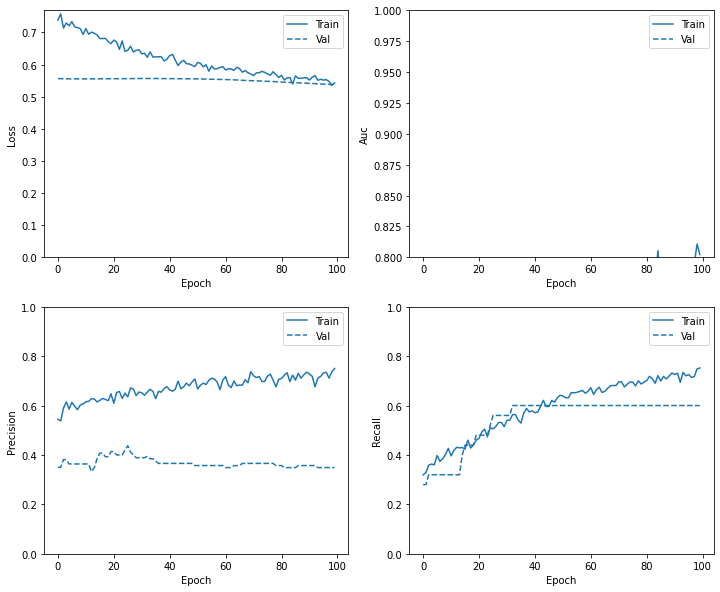

In [65]:
plot_metrics(resampled_history)

In [74]:
tf.random.set_seed(1222)
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 3s 87ms/step - loss: 0.7191 - tp: 4352.0000 - fp: 2900.3333 - tn: 8540.1905 - fn: 6810.9524 - accuracy: 0.5677 - precision: 0.5936 - recall: 0.3792 - auc: 0.6187 - val_loss: 0.5556 - val_tp: 11.0000 - val_fp: 17.0000 - val_tn: 96.0000 - val_fn: 14.0000 - val_accuracy: 0.7754 - val_precision: 0.3929 - val_recall: 0.4400 - val_auc: 0.7030
Epoch 2/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.6553 - tp: 5702.0952 - fp: 3177.6667 - tn: 8088.3810 - fn: 5462.3333 - accuracy: 0.6099 - precision: 0.6385 - recall: 0.5004 - auc: 0.6754 - val_loss: 0.5562 - val_tp: 15.0000 - val_fp: 26.0000 - val_tn: 87.0000 - val_fn: 10.0000 - val_accuracy: 0.7391 - val_precision: 0.3659 - val_recall: 0.6000 - val_auc: 0.7375
Epoch 3/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.6115 - tp: 6938.2857 - fp: 3234.6190 - tn: 7939.0000 - fn: 4318.5714 - accuracy: 0.6611 - precision: 0.6812 - recall: 0.6109 - auc: 0.725

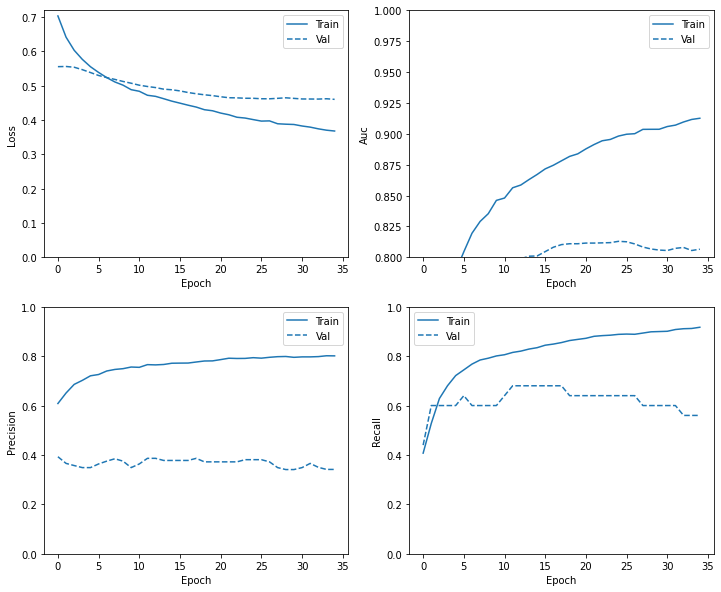

In [75]:
plot_metrics(resampled_history)

In [76]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6593720316886902
tp :  21.0
fp :  25.0
tn :  112.0
fn :  15.0
accuracy :  0.7687861323356628
precision :  0.45652174949645996
recall :  0.5833333134651184
auc :  0.7213098406791687

Legitimate Transactions Detected (True Negatives):  112
Legitimate Transactions Incorrectly Detected (False Positives):  25
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  21
Total Fraudulent Transactions:  36


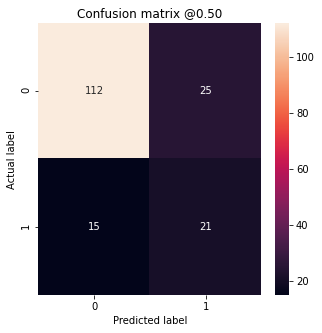

In [77]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

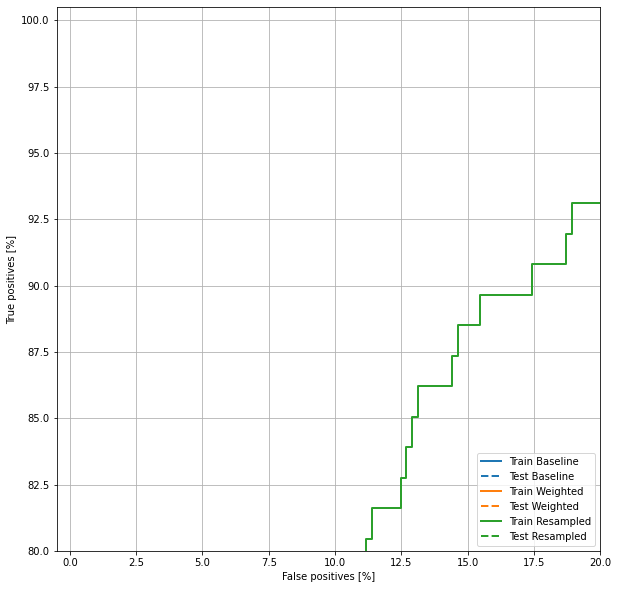

In [78]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')